In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/temp/Downloads/Loan Default Prediction - Student Files/data/vehicle_loans.csv")

In [3]:
df.shape

(233154, 41)

In [4]:
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [5]:
#Time span

df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

/Users/temp/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/temp/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/temp/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/temp/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23-09-2018' in

In [6]:

print(
    "Initial Disbursal Date:" + str(df['DISBURSAL_DATE'].min()),
    " "
    "Latest Disbursal Date:" + str(df['DISBURSAL_DATE'].max())
)

Initial Disbursal Date:2018-01-08 00:00:00  Latest Disbursal Date:2018-12-10 00:00:00


In [7]:
print('Timespan of data: ',df['DISBURSAL_DATE'].max()- df['DISBURSAL_DATE'].min())

Timespan of data:  336 days 00:00:00


In [8]:
df['EMPLOYMENT_TYPE'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [9]:
df[['EMPLOYMENT_TYPE','LOAN_DEFAULT']]

,EMPLOYMENT_TYPE,LOAN_DEFAULT
0,Salaried,0
1,Self employed,1
2,Self employed,0
3,Self employed,1
4,Self employed,1
...,...,...
233149,Salaried,0
233150,Self employed,0
233151,Salaried,0
233152,Salaried,0


In [10]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [11]:
df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

<AxesSubplot:xlabel='LOAN_DEFAULT', ylabel='count'>

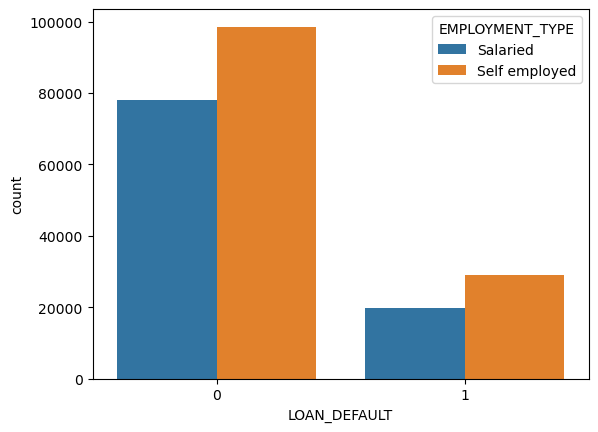

In [12]:
sns.countplot(x=df['LOAN_DEFAULT'],hue=df['EMPLOYMENT_TYPE'])

In [13]:
#null values

df.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [14]:
df['EMPLOYMENT_TYPE'].value_counts(normalize=True)

Self employed    0.566026
Salaried         0.433974
Name: EMPLOYMENT_TYPE, dtype: float64

<AxesSubplot:xlabel='EMPLOYMENT_TYPE', ylabel='count'>

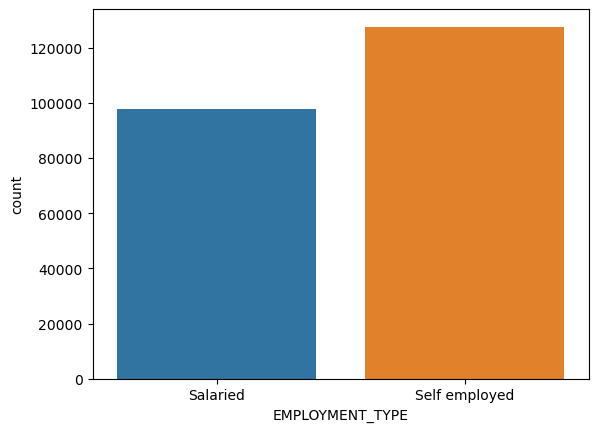

In [15]:
sns.countplot(x=df['EMPLOYMENT_TYPE'])

### Missing Data Imputation
1. Replace label at first
2. Engage in KNNimputer later

In [16]:
df.fillna(value={'EMPLOYMENT_TYPE':'Missing'},inplace=True)

<AxesSubplot:xlabel='EMPLOYMENT_TYPE', ylabel='count'>

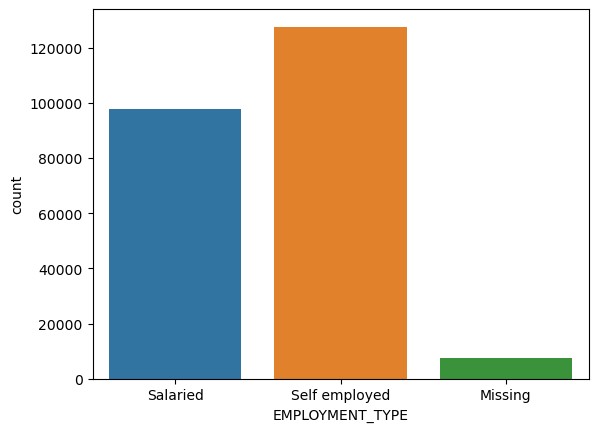

In [17]:
sns.countplot(x=df['EMPLOYMENT_TYPE'])

### New Column: Age

In [18]:
df['DATE_OF_BIRTH']=pd.to_datetime(df['DATE_OF_BIRTH'])

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/1715280024.py:1: UserWarning: Parsing '31-07-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_OF_BIRTH']=pd.to_datetime(df['DATE_OF_BIRTH'])
/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/1715280024.py:1: UserWarning: Parsing '24-08-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_OF_BIRTH']=pd.to_datetime(df['DATE_OF_BIRTH'])
/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/1715280024.py:1: UserWarning: Parsing '30-12-1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_OF_BIRTH']=pd.to_datetime(df['DATE_OF_BIRTH'])
/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/1715280024.py:1: UserWarning: Parsing '15-11-1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_fo

In [19]:
df['Age'] = df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH']

In [20]:
df['Age'] = df['Age'] // np.timedelta64(1,'Y')

### New Columns: Disbursal Month

In [21]:
df['DISBURSAL_MONTH'] = df['DISBURSAL_DATE'].dt.month

In [22]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH'],
      dtype='object')

In [23]:
loan_df = df[['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE','STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH']]

In [24]:
loan_df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
EMPLOYMENT_TYPE                         object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_A

### Reassessing the data type of columns
1. AVERAGE_ACCT_AGE
2. CREDIT_HISTORY_LENGTH

In [25]:
df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']]

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon
...,...,...
233149,1yrs 9mon,3yrs 3mon
233150,0yrs 6mon,0yrs 6mon
233151,0yrs 0mon,0yrs 0mon
233152,0yrs 0mon,0yrs 0mon


In [26]:
print(df['AVERAGE_ACCT_AGE'][0][0])

0


In [27]:
loan_df.shape

(233154, 41)

In [28]:
len = loan_df.shape[0]

In [29]:
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+')

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/765905249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+')


In [30]:
loan_df['AVERAGE_ACCT_AGE_MONTHS']

0          [0, 0]
1         [1, 11]
2          [0, 0]
3          [0, 8]
4          [0, 0]
           ...   
233149     [1, 9]
233150     [0, 6]
233151     [0, 0]
233152     [0, 0]
233153     [0, 0]
Name: AVERAGE_ACCT_AGE_MONTHS, Length: 233154, dtype: object

In [31]:
def acc_months(str_list):
    years = int(str_list[0])
    months= int(str_list[1])
    
    total_months = (years*12) + months
    return total_months

In [32]:
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(acc_months)

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/2253167564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(acc_months)


In [33]:
loan_df['CREDIT_HISTORY_LENGTH'] = loan_df['CREDIT_HISTORY_LENGTH'].str.findall('\d+')

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/129778598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['CREDIT_HISTORY_LENGTH'] = loan_df['CREDIT_HISTORY_LENGTH'].str.findall('\d+')


In [34]:
loan_df['CREDIT_HISTORY_LENGTH']

0          [0, 0]
1         [1, 11]
2          [0, 0]
3          [1, 3]
4          [0, 0]
           ...   
233149     [3, 3]
233150     [0, 6]
233151     [0, 0]
233152     [0, 0]
233153     [0, 0]
Name: CREDIT_HISTORY_LENGTH, Length: 233154, dtype: object

In [35]:
loan_df['CREDIT_HISTORY_LENGTH_MONTHS'] = loan_df['CREDIT_HISTORY_LENGTH'].map(acc_months)

In [36]:
loan_df[['CREDIT_HISTORY_LENGTH_MONTHS','AVERAGE_ACCT_AGE_MONTHS']]

,CREDIT_HISTORY_LENGTH_MONTHS,AVERAGE_ACCT_AGE_MONTHS
0,0,0
1,23,23
2,0,0
3,15,8
4,0,0
...,...,...
233149,39,21
233150,6,6
233151,0,0
233152,0,0


In [37]:
loan_df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age',
       'DISBURSAL_MONTH', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')

In [38]:
loan = loan_df[['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age',
       'DISBURSAL_MONTH', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS']]

In [39]:
loan[['PERFORM_CNS_SCORE','PERFORM_CNS_SCORE_DESCRIPTION']].value_counts()

PERFORM_CNS_SCORE  PERFORM_CNS_SCORE_DESCRIPTION               
0                  No Bureau History Available                     116950
300                M-Very High Risk                                  8776
738                C-Very Low Risk                                   8662
825                A-Very Low Risk                                   7393
15                 Not Scored: Sufficient History Not Available      3765
                                                                    ...  
834                A-Very Low Risk                                      1
837                A-Very Low Risk                                      1
838                A-Very Low Risk                                      1
884                A-Very Low Risk                                      1
863                A-Very Low Risk                                      1
Length: 573, dtype: int64

In [87]:
loan['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts(normalize=True)

No Bureau History Available                                0.501600
C-Very Low Risk                                            0.068817
A-Very Low Risk                                            0.060578
D-Very Low Risk                                            0.048715
B-Very Low Risk                                            0.039463
M-Very High Risk                                           0.037640
F-Low Risk                                                 0.036392
K-High Risk                                                0.035500
H-Medium Risk                                              0.029401
E-Low Risk                                                 0.024966
I-Medium Risk                                              0.023834
G-Low Risk                                                 0.017105
Not Scored: Sufficient History Not Available               0.016148
J-High Risk                                                0.016075
Not Scored: Not Enough Info available on the cus

In [41]:
loan.to_csv("/Users/temp/Downloads/Loan Default Prediction - Student Files/data/vehicle_loans_self_clean.csv")

### EDA


In [42]:
loan.nunique()

UNIQUEID                               233154
DISBURSED_AMOUNT                        24565
ASSET_COST                              46252
LTV                                      6579
BRANCH_ID                                  82
SUPPLIER_ID                              2953
MANUFACTURER_ID                            11
CURRENT_PINCODE_ID                       6698
EMPLOYMENT_TYPE                             3
STATE_ID                                   22
EMPLOYEE_CODE_ID                         3270
MOBILENO_AVL_FLAG                           1
AADHAR_FLAG                                 2
PAN_FLAG                                    2
VOTERID_FLAG                                2
DRIVING_FLAG                                2
PASSPORT_FLAG                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                           108
PRI_ACTIVE_ACCTS                           40
PRI_OVERDUE_ACCTS                 

In [45]:
loan['PRI_OVERDUE_ACCTS'].value_counts()

0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
14         5
13         5
18         2
17         2
23         1
19         1
15         1
16         1
25         1
Name: PRI_OVERDUE_ACCTS, dtype: int64

In [50]:
loan['PRI_DISBURSED_AMOUNT'].sample(10)

151963          0
130497    2847056
83925           0
33678           0
42764     3000000
48716      395999
210318          0
185920          0
213607     230000
8741       101989
Name: PRI_DISBURSED_AMOUNT, dtype: int64

In [54]:
#Comparing the similarity of the columns 
loan[['PRI_DISBURSED_AMOUNT','PRI_SANCTIONED_AMOUNT']].sample(15)

,PRI_DISBURSED_AMOUNT,PRI_SANCTIONED_AMOUNT
7767,0,0
149905,0,0
229278,3764000,2400000
137253,0,0
123485,1277000,1277000
115392,93760,93760
206503,45000,45000
85448,0,0
188842,0,0
135257,35000,35000


In [67]:
dif = loan['PRI_DISBURSED_AMOUNT'] -loan['PRI_SANCTIONED_AMOUNT']

In [69]:
dif.nunique()

11128

In [70]:
#Same value across, no predictive power and can be dropped
loan['MOBILENO_AVL_FLAG']

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Name: MOBILENO_AVL_FLAG, Length: 233154, dtype: int64

In [71]:
loan.drop('MOBILENO_AVL_FLAG',axis=1,inplace=True)

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/80532379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.drop('MOBILENO_AVL_FLAG',axis=1,inplace=True)


In [80]:
loan_400 = loan[loan['PERFORM_CNS_SCORE'] >= 400 ]['PERFORM_CNS_SCORE']

<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='Count'>

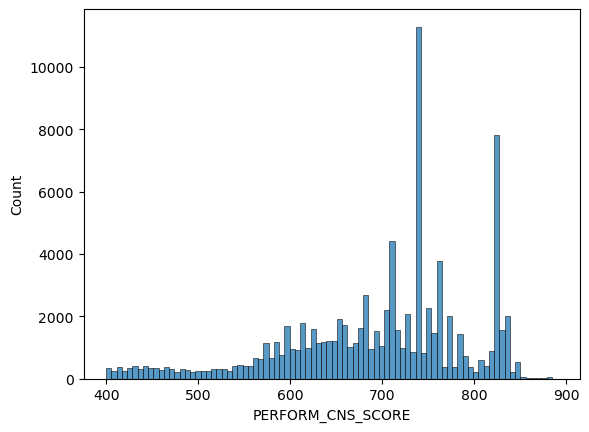

In [81]:
sns.histplot(loan_400)

In [86]:
loan[loan['PERFORM_CNS_SCORE_DESCRIPTION'] == 'No Bureau History Available']['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.768687
1    0.231313
Name: LOAN_DEFAULT, dtype: float64

50 percent of loans are given to individuals with no bureau history, despite that only 23 percent have defaulted on their loans

In [88]:
loan[loan['PERFORM_CNS_SCORE'] == 0]['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.768687
1    0.231313
Name: LOAN_DEFAULT, dtype: float64

'PERFORMANCE_CNS_SCORE_DESCRIPTOON' is a categorical data series that describes 'PERFORMANCE_CNS_SCORE'. That means they are colinear and thus one could be dropped without impacting the model

In [134]:
loan['MANUFACTURER_ID'].value_counts(normalize=True)

86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64

<AxesSubplot:xlabel='MANUFACTURER_ID', ylabel='count'>

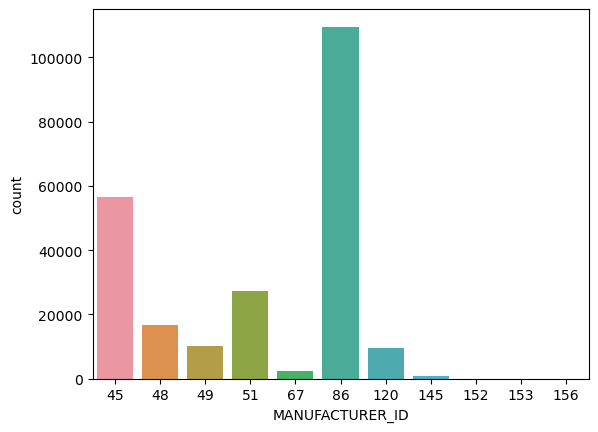

In [136]:
sns.countplot(x=loan['MANUFACTURER_ID'])

<AxesSubplot:xlabel='MANUFACTURER_ID,LOAN_DEFAULT'>

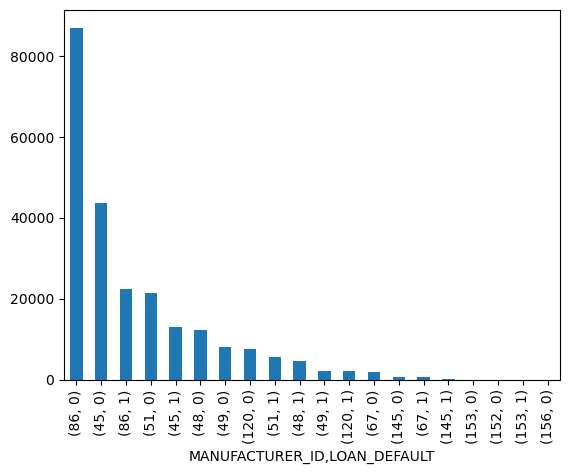

In [95]:
loan[['MANUFACTURER_ID','LOAN_DEFAULT']].value_counts().plot(kind='bar')

In [145]:
loan.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


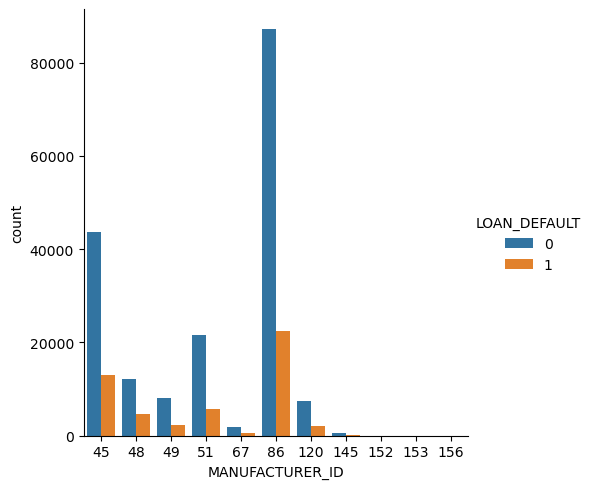

In [150]:
sns.catplot(data=loan,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

## Create reusable function

In [220]:
def explore_cat(df,col_name,target_col):
    print(df[col_name].value_counts())
    print(df[col_name].value_counts(normalize=True))
    print(df.groupby(col_name)[target_col].value_counts().unstack(level=-1))
    print(df.groupby(col_name)[target_col].value_counts(normalize=True).unstack(level=-1))
    sns.catplot(data=df,x=col_name,hue=target_col,kind='count')

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64
Self employed    0.547428
Salaried         0.419714
Missing          0.032858
Name: EMPLOYMENT_TYPE, dtype: float64
LOAN_DEFAULT            0         1
EMPLOYMENT_TYPE                    
Missing          0.785407  0.214593
Salaried         0.796542  0.203458
Self employed    0.772343  0.227657


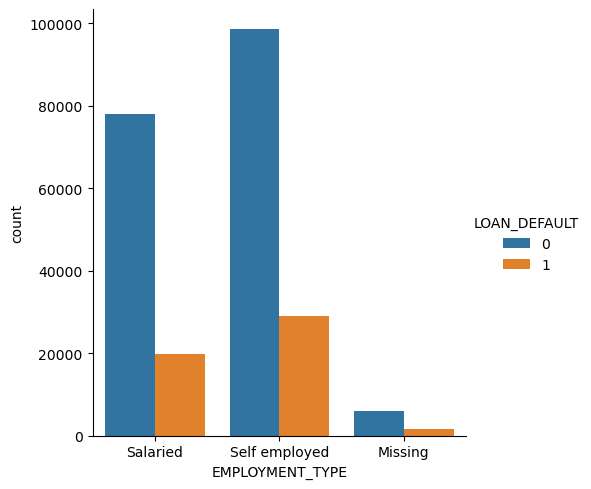

In [165]:
explore_cat(loan,'EMPLOYMENT_TYPE',"LOAN_DEFAULT")

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64
LOAN_DEFAULT            0         1
DISBURSAL_MONTH                    
1                0.770492  0.229508
2                0.920000  0.080000
3                0.795260  0.204740
4                0.785822  0.214178
5                0.788581  0.211419
6                0.784009  0.215991
7                0.776386  0.223614
8                0.788732  0.211268
9                0.806532  0.193468
10               0.759635  0.240365
11               0.817409  0.182591
12               0.796366  0.203634


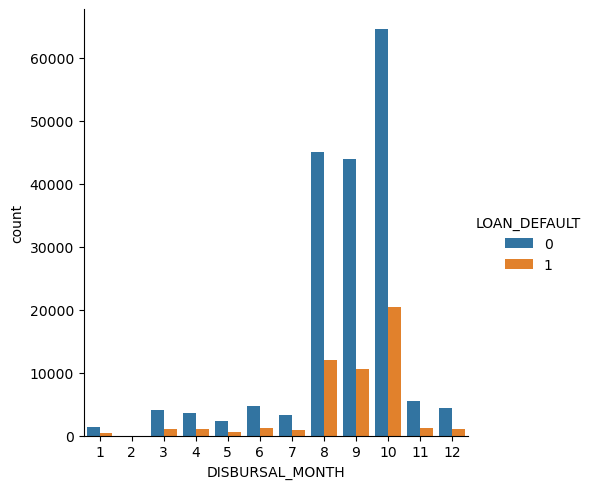

In [166]:
explore_cat(loan,'DISBURSAL_MONTH',"LOAN_DEFAULT")

In [96]:
loan.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'AADHAR_FLAG',
       'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')

In [99]:
loans = loan.drop(['SUPPLIER_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','BRANCH_ID'],axis=1)

In [100]:
loans.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
0,420825,50578,58400,89.55,45,Salaried,6,1,0,0,...,0,0,0,0,0,0,34,3,0,0
1,537409,47145,65550,73.23,45,Self employed,6,1,0,0,...,1991,0,0,1,0,1,33,9,23,23
2,417566,53278,61360,89.63,45,Self employed,6,1,0,0,...,0,0,0,0,0,0,32,1,0,0
3,624493,57513,66113,88.48,45,Self employed,6,1,0,0,...,31,0,0,0,1,1,24,10,8,15
4,539055,52378,60300,88.39,45,Self employed,6,1,0,0,...,0,0,0,0,1,1,41,9,0,0


In [103]:
loans['STATE_ID'].value_counts(normalize=True)

4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: STATE_ID, dtype: float64

In [117]:
state_id = [4,3,6]

In [122]:
loans[loans['STATE_ID'].isin(state_id)]['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.799374
1    0.200626
Name: LOAN_DEFAULT, dtype: float64

Roughly 50 percent of loans are made to individuals from STATE_ID = [4,3,6]. Only 20 percent of the loans resulted in a default

Text(0.5, 1.0, 'Default Rate of States Outside of [4,3,6]')

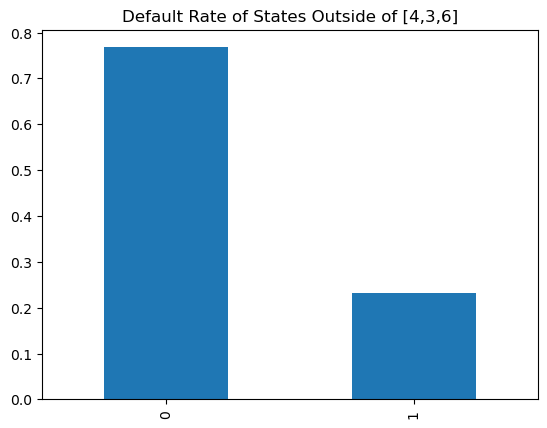

In [133]:
loans[~loans['STATE_ID'].isin(state_id)]['LOAN_DEFAULT'].value_counts(normalize=True).plot(kind='bar')
plt.title('Default Rate of States Outside of [4,3,6]')

### Continous Variables

<AxesSubplot:xlabel='Age'>

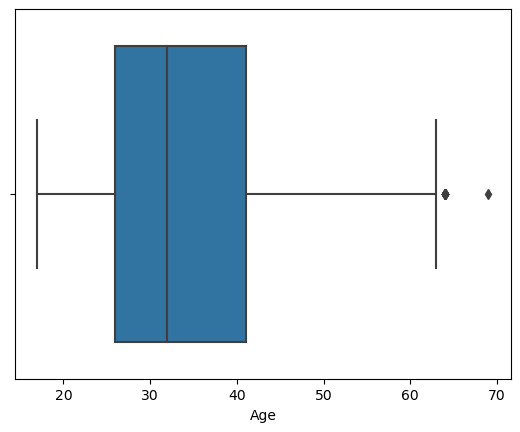

In [172]:
sns.boxplot(x=loans['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

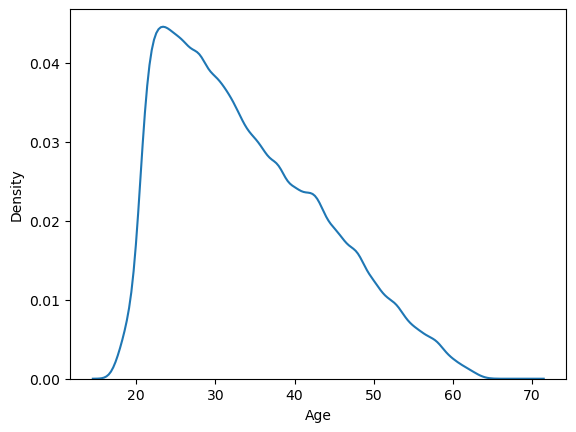

In [178]:
sns.kdeplot(x=loans['Age'])

In [180]:
loans.groupby('LOAN_DEFAULT')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
LOAN_DEFAULT,,,,,,,,
0,182543.0,34.090713,9.860825,17.0,26.0,32.0,41.0,69.0
1,50611.0,33.225366,9.685441,17.0,25.0,31.0,40.0,64.0


<AxesSubplot:xlabel='Age', ylabel='LOAN_DEFAULT'>

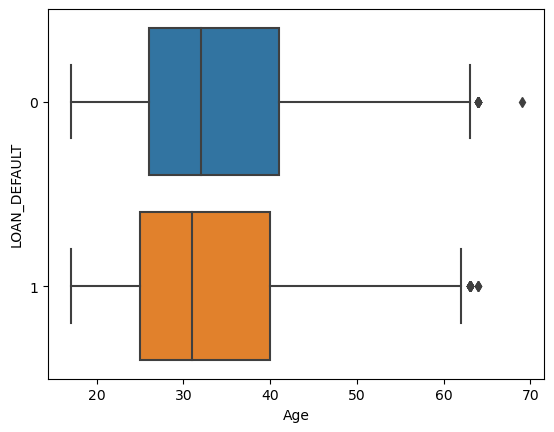

In [182]:
sns.boxplot(data=loans,x='Age',y='LOAN_DEFAULT',orient='h')

## Creating function to summarise continous variables

In [213]:
def explore_cont(df,col_name,target_col):
    print("{0} summary statistic:".format(col_name))
    print(df[col_name].describe())
    print("\n")
    
    print("{0} distribution by target variable:".format(col_name))
    print(df.groupby(target_col)[col_name].describe())
    
    sns.boxplot(data=df,x=col_name)
    plt.show()
    sns.kdeplot(data=df,x=col_name)
    plt.show()
    sns.boxplot(data=df,x=col_name,y=target_col,orient='h')
    plt.show()

LTV summary statistic:
count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: LTV, dtype: float64


LTV distribution by target variable:
                 count       mean        std    min     25%    50%    75%  \
LOAN_DEFAULT                                                                
0             182543.0  74.154093  11.681455  10.03  68.020  76.00  83.16   
1              50611.0  76.883322  10.327771  15.30  72.055  79.06  84.68   

               max  
LOAN_DEFAULT        
0             95.0  
1             95.0  


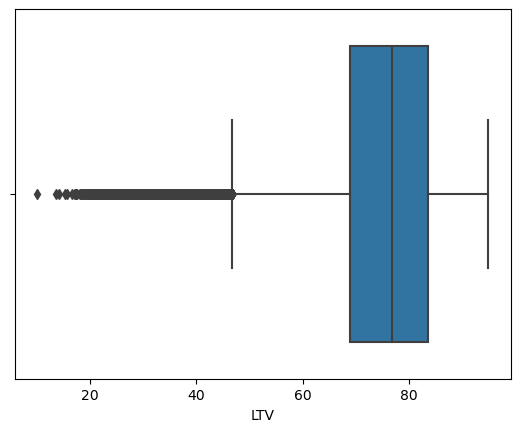

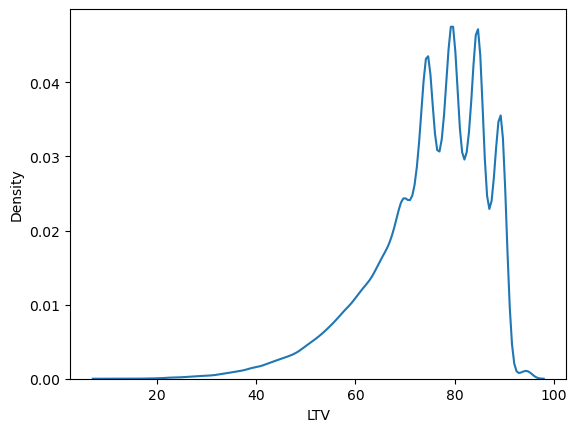

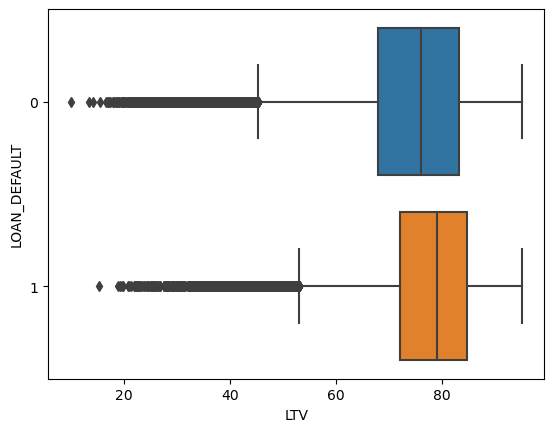

In [214]:
explore_cont(loans,'LTV','LOAN_DEFAULT')

ASSET_COST summary statistic:
count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: ASSET_COST, dtype: float64


ASSET_COST distribution by target variable:
                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  75722.806128  19015.002867  37000.0  65680.0  70845.0   
1              50611.0  76378.176661  18680.502609  37000.0  65894.0  71326.0   

                  75%        max  
LOAN_DEFAULT                      
0             78999.0  1628992.0  
1             80061.5   281164.0  


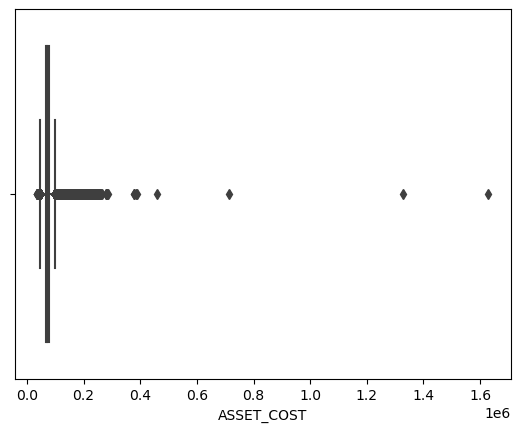

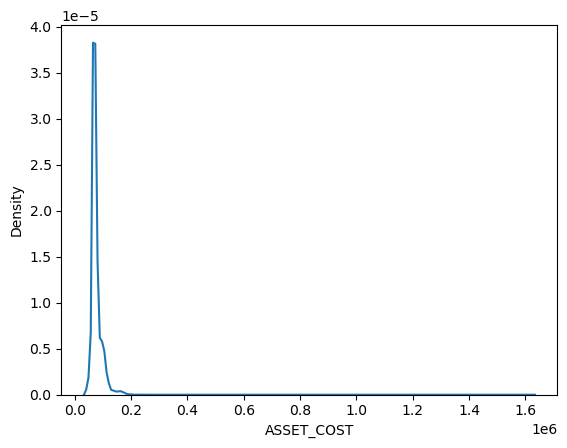

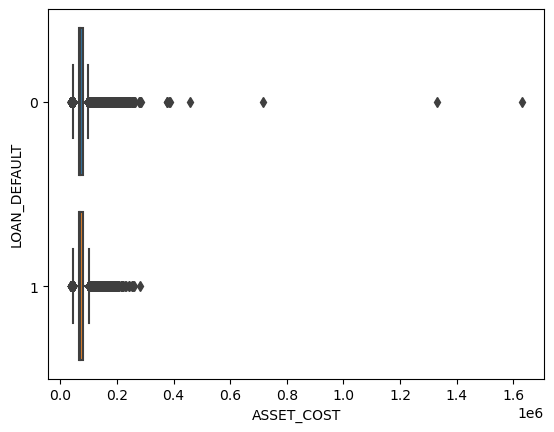

In [215]:
explore_cont(loans,'ASSET_COST','LOAN_DEFAULT')

## Binary Variables

0    227735
1      5419
Name: DRIVING_FLAG, dtype: int64
0    0.976758
1    0.023242
Name: DRIVING_FLAG, dtype: float64
LOAN_DEFAULT       0      1
DRIVING_FLAG               
0             178216  49519
1               4327   1092
LOAN_DEFAULT         0         1
DRIVING_FLAG                    
0             0.782559  0.217441
1             0.798487  0.201513


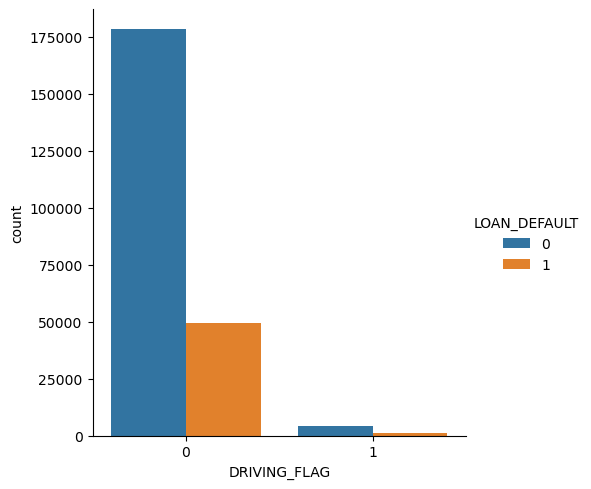

In [221]:
explore_cat(loans,'DRIVING_FLAG','LOAN_DEFAULT')

## Binning

DISBURSED_AMOUNT summary statistic:
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


DISBURSED_AMOUNT distribution by target variable:
                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


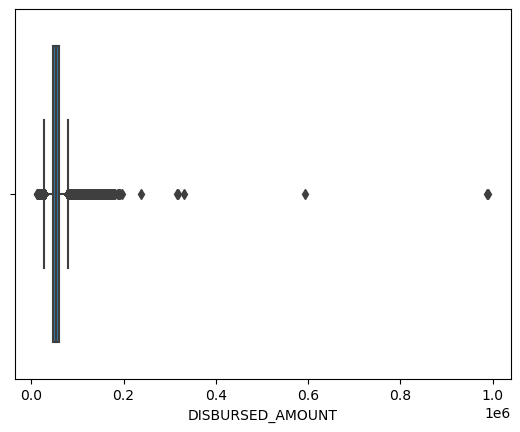

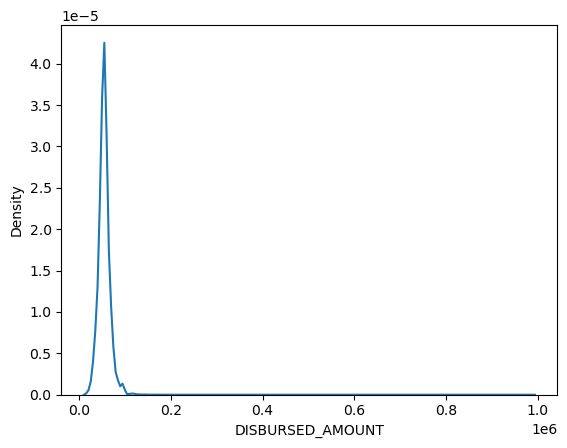

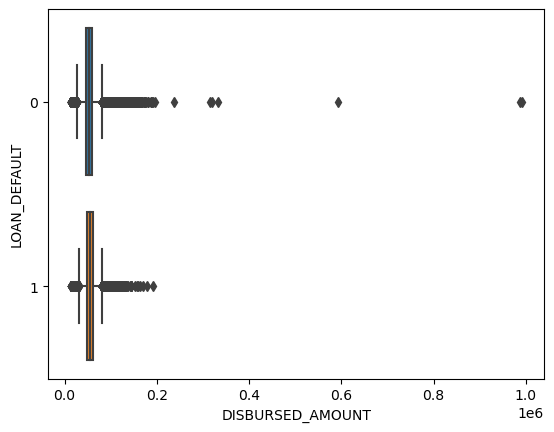

In [222]:
explore_cont(loans,'DISBURSED_AMOUNT','LOAN_DEFAULT')

In [223]:
loans['DISBURSED_AMOUNT'].idxmax()

210252

In [226]:
loans.loc[loans['DISBURSED_AMOUNT'].idxmax()]

UNIQUEID                                                                          440173
DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG        

In [232]:
disbursed_buckets = [13000,30000,45000,60000,75000,150000,1000000]
disbursed_labels = ['13k-30k','30k-45k','45k-60k','60k-75k','75k-150k','150k-1000k']

In [236]:
loans['DISBURSED_BINS'] = pd.cut(loans['DISBURSED_AMOUNT'],disbursed_buckets,labels=disbursed_labels)

45k-60k       126904
60k-75k        49824
30k-45k        40626
75k-150k       10871
13k-30k         4865
150k-1000k        64
Name: DISBURSED_BINS, dtype: int64
45k-60k       0.544293
60k-75k       0.213696
30k-45k       0.174245
75k-150k      0.046626
13k-30k       0.020866
150k-1000k    0.000274
Name: DISBURSED_BINS, dtype: float64
LOAN_DEFAULT        0      1
DISBURSED_BINS              
13k-30k          4207    658
30k-45k         34323   6303
45k-60k         98830  28074
60k-75k         37056  12768
75k-150k         8070   2801
150k-1000k         57      7
LOAN_DEFAULT           0         1
DISBURSED_BINS                    
13k-30k         0.864748  0.135252
30k-45k         0.844853  0.155147
45k-60k         0.778778  0.221222
60k-75k         0.743738  0.256262
75k-150k        0.742342  0.257658
150k-1000k      0.890625  0.109375


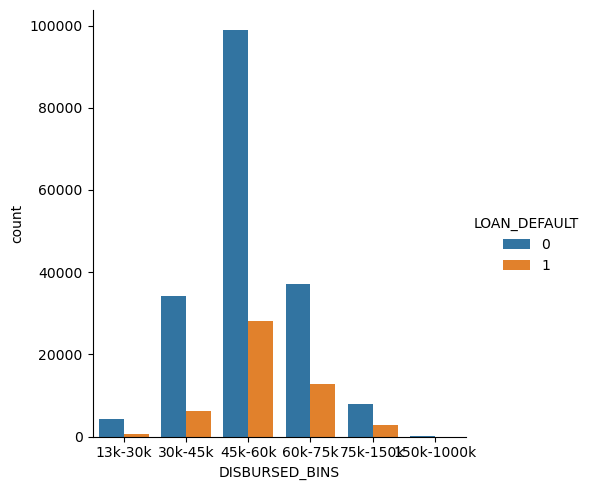

In [237]:
explore_cat(loans,'DISBURSED_BINS','LOAN_DEFAULT')

# Merging Columns of the nature:
1. PRI
2. SEC

In [238]:
#merging function
def merge_ps(col_name,col_name_2):
    loans[f'TOTAL{col_name[3:]}'] = loans[col_name] + loans[col_name_2]

In [239]:
merge_ps('PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS')

In [240]:
loans.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'DISBURSED_BINS', 'TOTAL_NO_OF_ACCTS'],
      dtype='object')

In [247]:
loans[['TOTAL_NO_OF_ACCTS','PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS']]

,TOTAL_NO_OF_ACCTS,PRI_NO_OF_ACCTS,SEC_NO_OF_ACCTS
0,0,0,0
1,1,1,0
2,0,0,0
3,3,3,0
4,0,0,0
...,...,...,...
233149,4,4,0
233150,1,1,0
233151,0,0,0
233152,0,0,0


In [254]:
merge_ps('SEC_INSTAL_AMT','PRIMARY_INSTAL_AMT')

In [255]:
loans.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'DISBURSED_BINS', 'TOTAL_NO_OF_ACCTS', 'TOTAL_ACTIVE_ACCTS',
       'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT',
       'TOTA

In [261]:
loans_df = loans[['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'DISBURSED_BINS', 'TOTAL_NO_OF_ACCTS', 'TOTAL_ACTIVE_ACCTS',
       'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT',
       'TOTAL_INSTAL_AMT']]

In [266]:
loans_df['OVERDUE_PERCENT'] = loans_df['TOTAL_OVERDUE_ACCTS'] / loans_df['TOTAL_NO_OF_ACCTS']

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/2977156666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df['OVERDUE_PERCENT'] = loans_df['TOTAL_OVERDUE_ACCTS'] / loans_df['TOTAL_NO_OF_ACCTS']


In [267]:
loans_df['OVERDUE_PERCENT'].isnull().sum()

115792

In [271]:
loans_df['OVERDUE_PERCENT'].fillna(0,inplace=True)

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/2738533736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df['OVERDUE_PERCENT'].fillna(0,inplace=True)


In [272]:
loans_df['OVERDUE_PERCENT'].isnull().sum()

0

In [284]:
loans_df['DISBURSAL_DIFFERENCE']= loans_df['ASSET_COST'] - loans_df['DISBURSED_AMOUNT'] 

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/2220582183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df['DISBURSAL_DIFFERENCE']= loans_df['ASSET_COST'] - loans_df['DISBURSED_AMOUNT']


DISBURSAL_DIFFERENCE summary statistic:
count    233154.000000
mean      21508.074616
std       12539.547453
min        3997.000000
25%       13086.000000
50%       17987.000000
75%       26606.000000
max      638420.000000
Name: DISBURSAL_DIFFERENCE, dtype: float64


DISBURSAL_DIFFERENCE distribution by target variable:
                 count          mean           std     min      25%      50%  \
LOAN_DEFAULT                                                                   
0             182543.0  21896.335017  12675.675456  4011.0  13381.0  18371.0   
1              50611.0  20107.702792  11931.391303  3997.0  12311.0  16571.0   

                  75%       max  
LOAN_DEFAULT                     
0             27019.0  638420.0  
1             24617.5  161010.0  


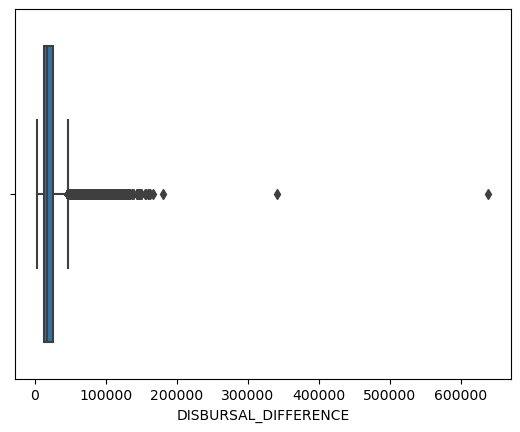

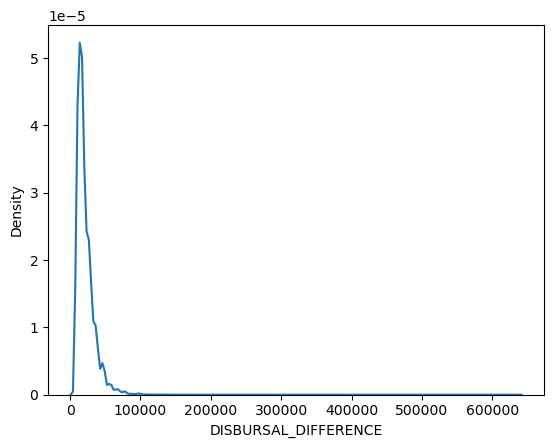

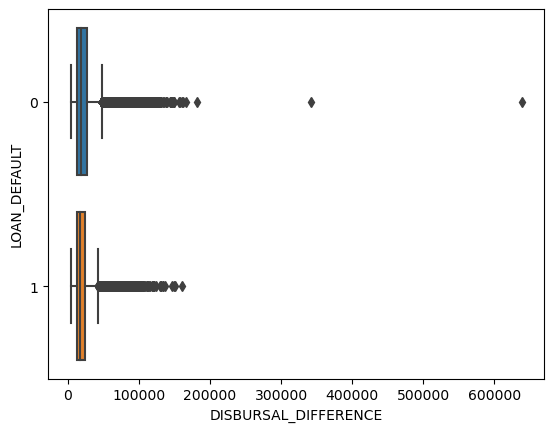

In [286]:
explore_cont(loans_df,'DISBURSAL_DIFFERENCE','LOAN_DEFAULT')

In [273]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   UNIQUEID                             233154 non-null  int64   
 1   DISBURSED_AMOUNT                     233154 non-null  int64   
 2   ASSET_COST                           233154 non-null  int64   
 3   LTV                                  233154 non-null  float64 
 4   MANUFACTURER_ID                      233154 non-null  int64   
 5   EMPLOYMENT_TYPE                      233154 non-null  object  
 6   STATE_ID                             233154 non-null  int64   
 7   AADHAR_FLAG                          233154 non-null  int64   
 8   PAN_FLAG                             233154 non-null  int64   
 9   VOTERID_FLAG                         233154 non-null  int64   
 10  DRIVING_FLAG                         233154 non-null  int64   
 11  

In [274]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [287]:
#listing continuous features
loans_df.describe().columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID',
       'STATE_ID', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Age', 'DISBURSAL_MONTH', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS', 'TOTAL_NO_OF_ACCTS',
       'TOTAL_ACTIVE_ACCTS', 'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT', 'TOTAL_INSTAL_AMT',
       'OVERDUE_PERCENT', 'DISBURSAL_DIFFERENCE'],
      dtype='object')

In [303]:
continuous_col = ['DISBURSED_AMOUNT','ASSET_COST', 'LTV',  'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
        'Age', 'AVERAGE_ACCT_AGE_MONTHS','CREDIT_HISTORY_LENGTH_MONTHS', 'TOTAL_NO_OF_ACCTS',
       'TOTAL_ACTIVE_ACCTS', 'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT', 'TOTAL_INSTAL_AMT',
       'OVERDUE_PERCENT','DISBURSAL_DIFFERENCE']

In [289]:
#create instance

scaler = MinMaxScaler()

<AxesSubplot:>

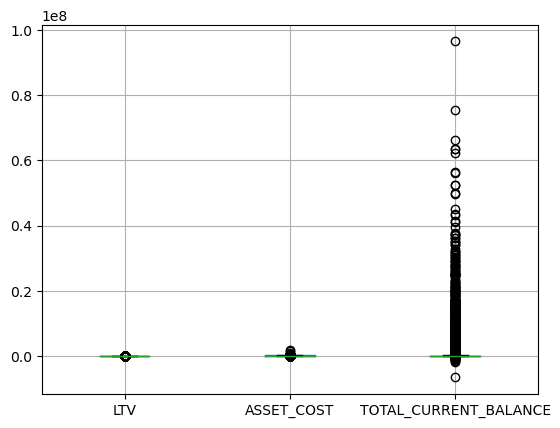

In [292]:
loans_df[['LTV','ASSET_COST','TOTAL_CURRENT_BALANCE']].boxplot()

In [311]:
loans_df[continuous_col]= scaler.fit_transform(loans_df[continuous_col])

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/3365805746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df[continuous_col]= scaler.fit_transform(loans_df[continuous_col])


<AxesSubplot:>

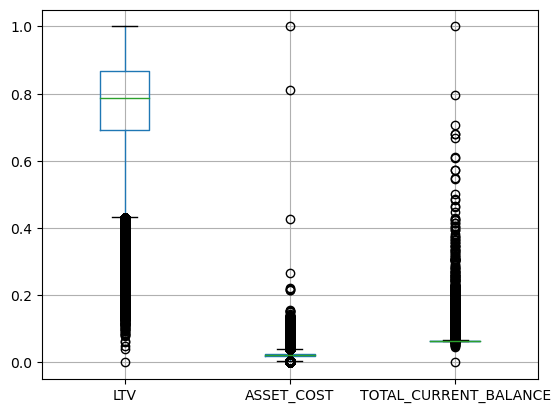

In [312]:
loans_df[['LTV','ASSET_COST','TOTAL_CURRENT_BALANCE']].boxplot()

<AxesSubplot:>

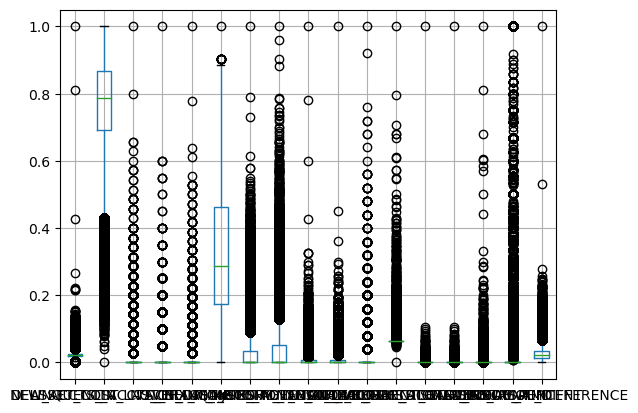

In [332]:
loans_df[continuous_col].boxplot()

In [327]:
categories = ['MANUFACTURER_ID','STATE_ID','DISBURSAL_MONTH','DISBURSED_BINS','PERFORM_CNS_SCORE_DESCRIPTION','EMPLOYMENT_TYPE']

In [328]:
loans_df[categories] = loans_df[categories].astype('category')

/var/folders/m7/wpvv_hq54zd59bvwwk6mq9mr0000gn/T/ipykernel_20610/2747374793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df[categories] = loans_df[categories].astype('category')


In [329]:
loans_df[categories].dtypes

MANUFACTURER_ID                  category
STATE_ID                         category
DISBURSAL_MONTH                  category
DISBURSED_BINS                   category
PERFORM_CNS_SCORE_DESCRIPTION    category
EMPLOYMENT_TYPE                  category
dtype: object

In [376]:
loans_df.to_csv('loans_df_2')